In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [2]:
df_all = pd.read_csv('../reports/fine_tune_best/results.csv')

In [3]:
df_all

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
0,adam,0.0005,False,False,0.0,1.0,False,14.207693,2.985588
1,adam,0.0005,False,False,0.0,1.0,True,14.207693,2.985588
2,adam,0.0005,False,False,0.0,2.0,False,15.464421,3.001647
3,adam,0.0005,False,False,0.0,2.0,True,14.400676,2.953753
4,adam,0.0005,False,False,0.0,3.0,False,13.840755,2.830283
...,...,...,...,...,...,...,...,...,...
1627,adam,0.0050,True,True,NaN,11.0,True,13.140385,2.696074
1628,adam,0.0050,True,True,NaN,12.0,True,13.264708,2.747246
1629,adam,0.0050,True,True,NaN,13.0,True,13.187493,2.709304
1630,adam,0.0050,True,True,NaN,14.0,True,13.114382,2.680277


In [4]:
def get_experiment(ls, ams, exp):
    return df_all[(df_all['learning_rate'] == lr) & (df_all['amsgrad'] == ams) &
                  (df_all['exponential_decay'] == exp)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [5]:
comb_dict = {'learning_rate': [0.0005, 0.001, 0.005],
             'amsgrad': [False, True],
             'exponential_decay': [False, True]}

combs = list(training.make_runs(comb_dict))

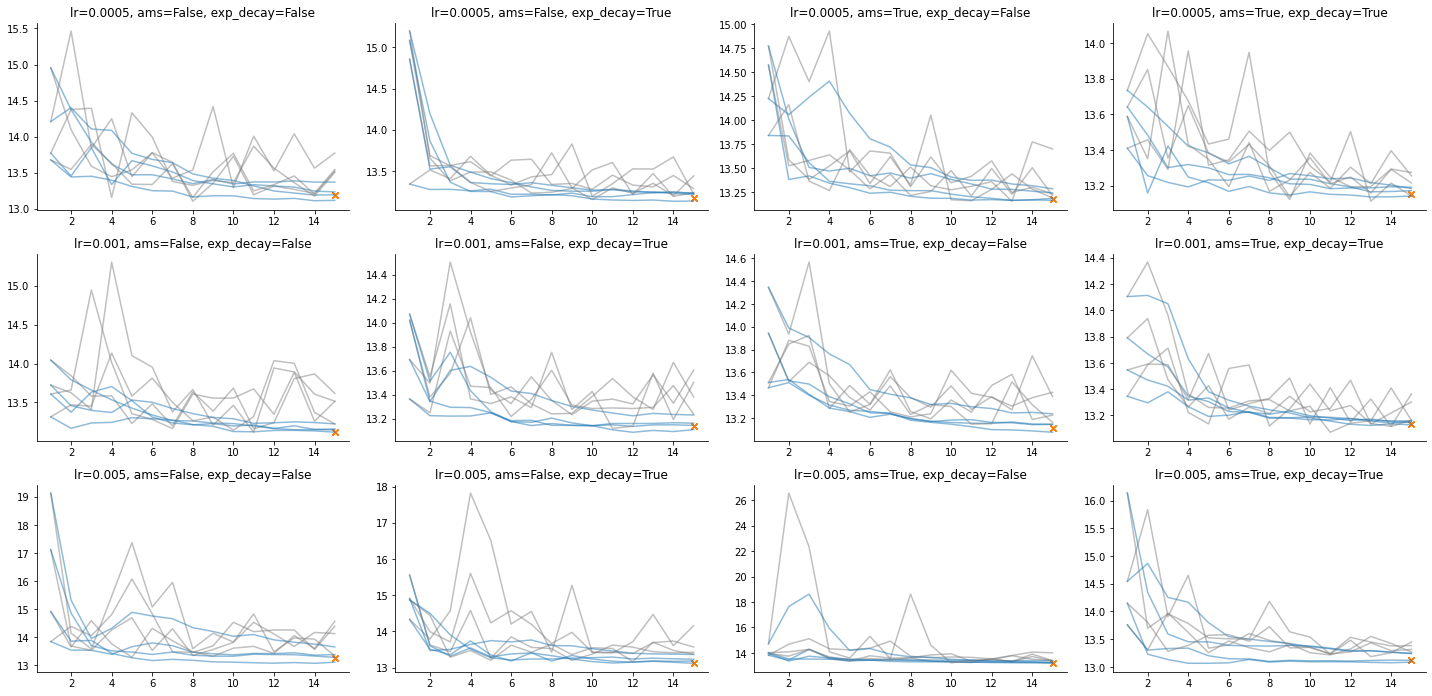

In [6]:
plt.figure(figsize=(20, 32))

for i in range(len(combs)):
    ax = plt.subplot(10, 4, i+1)
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exponential_decay']
    ex = get_experiment(lr, ams, exp)
    title = 'lr={}, ams={}, exp_decay={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

## Aggregates

In [7]:
df_all['name'] = df_all.apply(lambda x: '{}_{}_{}'.format(x['learning_rate'], x['amsgrad'], x['exponential_decay']), axis=1)
df_final = df_all[df_all['epoch'].isna()]

(13.0, 13.3)

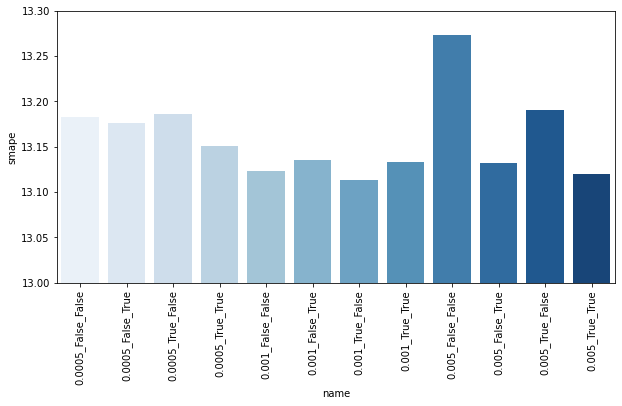

In [8]:
plt.figure(figsize=(10, 5))

sns.barplot(x='name', y='smape', data=df_final, palette='Blues')
plt.xticks(rotation=90)
plt.ylim(13, 13.3)

<AxesSubplot:xlabel='learning_rate', ylabel='smape'>

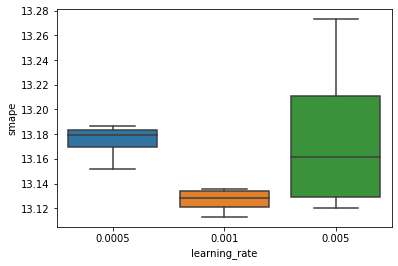

In [9]:
sns.boxplot(x='learning_rate', y='smape', data=df_final)

<AxesSubplot:xlabel='amsgrad', ylabel='smape'>

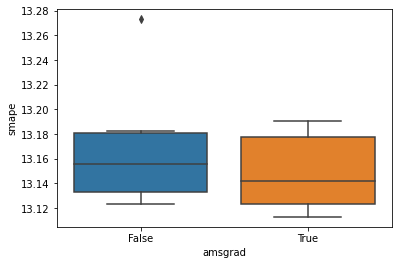

In [10]:
sns.boxplot(x='amsgrad', y='smape', data=df_final)

<AxesSubplot:xlabel='exponential_decay', ylabel='smape'>

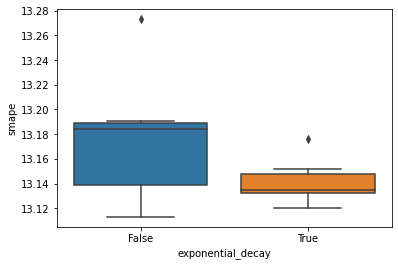

In [11]:
sns.boxplot(x='exponential_decay', y='smape', data=df_final)

Text(0.5, 1.0, 'Exponential decay')

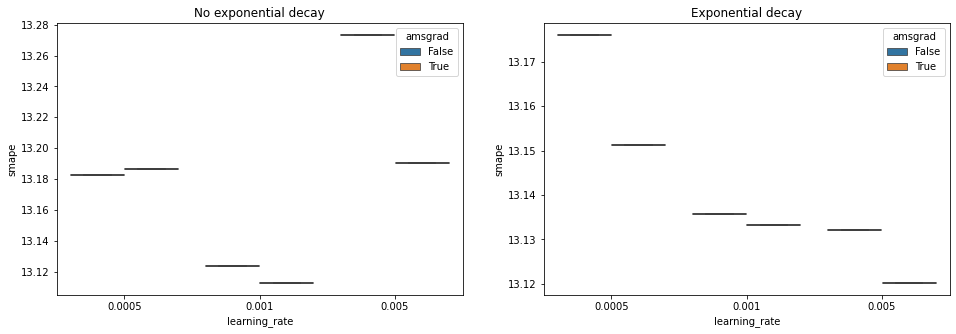

In [12]:
plt.figure(figsize=(16, 5))

ax = plt.subplot(121)
sns.boxplot(x='learning_rate', y='smape', data=df_final[~df_final['exponential_decay']], hue='amsgrad', ax=ax)
ax.set_title('No exponential decay')


ax = plt.subplot(122)
sns.boxplot(x='learning_rate', y='smape', data=df_final[df_final['exponential_decay']], hue='amsgrad', ax=ax)
ax.set_title('Exponential decay')

In [13]:
df_final.sort_values('smape')

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*,name
951,adam,0.0010,True,False,NaN,NaN,True,13.112861,2.675382,0.001_True_False
1631,adam,0.0050,True,True,NaN,NaN,True,13.120285,2.695654,0.005_True_True
679,adam,0.0010,False,False,NaN,NaN,True,13.123666,2.680102,0.001_False_False
1359,adam,0.0050,False,True,NaN,NaN,True,13.132069,2.685439,0.005_False_True
1087,adam,0.0010,True,True,NaN,NaN,True,13.133338,2.676037,0.001_True_True
815,adam,0.0010,False,True,NaN,NaN,True,13.135744,2.676136,0.001_False_True
543,adam,0.0005,True,True,NaN,NaN,True,13.151379,2.680025,0.0005_True_True
271,adam,0.0005,False,True,NaN,NaN,True,13.175950,2.692430,0.0005_False_True
135,adam,0.0005,False,False,NaN,NaN,True,13.182585,2.688002,0.0005_False_False
407,adam,0.0005,True,False,NaN,NaN,True,13.186265,2.690940,0.0005_True_False
